In [53]:
from random import gauss

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

from sklearn.svm import SVC

In [54]:
def generate_data(mean_x, mean_y, sigma, n):
    x = [gauss(mean_x, sigma) for i in xrange(n)]
    y = [gauss(mean_y, sigma) for i in xrange(n)]
    return x, y

In [59]:
mean_1_x, mean_1_y = [3, 3]
mean_2_x, mean_2_y = [-3, -3]
sigma = 3
n = 50

x1, y1 = generate_data(mean_1_x, mean_1_y, sigma, n)
x2, y2 = generate_data(mean_2_x, mean_2_y, sigma, n)

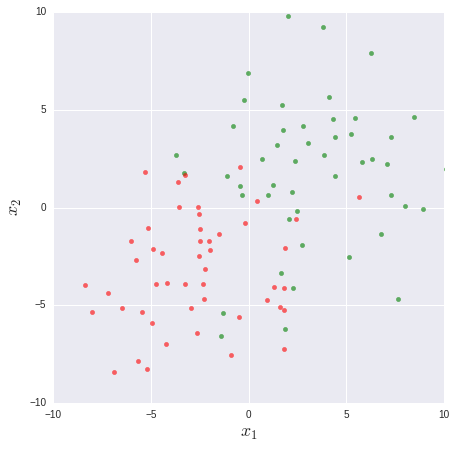

In [60]:
plt.figure(figsize=(7,7))
plt.scatter(x1, y1, color = 'g', alpha = 0.6)
plt.scatter(x2, y2, color = 'r', alpha = 0.6)

plt.xlim([-10,10])
plt.ylim([-10,10])

plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$x_2$", fontsize = 18)

plt.savefig("unseparable_data.png")

plt.show()


In [23]:
df = pd.read_csv("svm_data.txt")

n = len(df)
X = np.hstack((df['x1'].values, df['x2'].values))

tmp1 = np.vstack((df.x1,df.y1)).T
tmp2 = np.vstack((df.x2,df.y2)).T

X = np.vstack((tmp1, tmp2))
y = np.hstack((np.ones(n), -1*np.ones(n)))

In [24]:
svc = SVC(kernel='linear')
svc.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
def plot_svc_decision(svc, df):
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-10, 10)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
    yy_down = yy + margin*np.sqrt(1 + a**2)
    yy_up = yy - margin*np.sqrt(1 + a**2)

    plt.xlim([-10,10])
    plt.ylim([-10,10])

    plt.xlabel("x1", fontsize = 18)
    plt.ylabel("x2", fontsize = 18)
    
    vectors = svc.support_vectors_
    svx = [x[0] for x in vectors]
    svy = [y[1] for y in vectors]
    plt.scatter(svx, svy, color = 'w', s = 100, alpha=1, edgecolors='k')   
    
    plt.scatter(df.x1, df.y1, color = 'g', alpha = 0.6)
    plt.scatter(df.x2, df.y2, color = 'r', alpha = 0.6)
    
    plt.plot(xx, yy, 'b-', alpha = 0.6)
    plt.plot(xx, yy_down, 'b--', alpha = 0.3)
    plt.plot(xx, yy_up, 'b--', alpha = 0.3)
    
    #plt.savefig("svm_support_vectors.svg")
    plt.show()

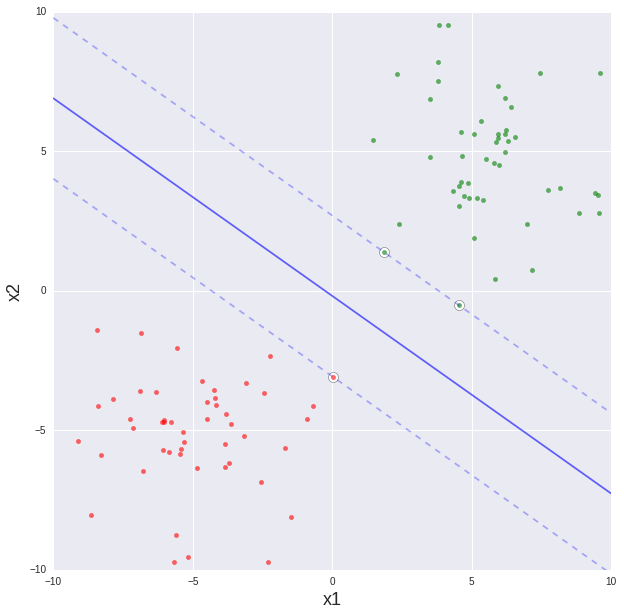

In [28]:
plt.figure(figsize=(10,10))
plot_svc_decision(svc, df)

In [12]:
df.head()

,x1,y1,x2,y2
0,5.875726,5.332958,-2.308002,-9.725732
1,3.503029,6.892049,-3.831643,-5.488616
2,1.864338,1.377712,-3.172096,-5.208648
3,8.159225,3.702010,-5.663392,-9.709332
4,5.325392,6.092378,-6.070087,-5.722986


In [33]:
df['x1'][0] = -6
df['y1'][0] = 0

In [34]:
df.head()

,x1,y1,x2,y2
0,-6.000000,0.000000,-2.308002,-9.725732
1,3.503029,6.892049,-3.831643,-5.488616
2,1.864338,1.377712,-3.172096,-5.208648
3,8.159225,3.702010,-5.663392,-9.709332
4,5.325392,6.092378,-6.070087,-5.722986


In [52]:
n = len(df)
X = np.hstack((df['x1'].values, df['x2'].values))

tmp1 = np.vstack((df.x1,df.y1)).T
tmp2 = np.vstack((df.x2,df.y2)).T

X = np.vstack((tmp1, tmp2))
y = np.hstack((np.ones(n), -1*np.ones(n)))

svc = SVC(kernel='linear', C = 0.1)
svc.fit(X, y) 

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

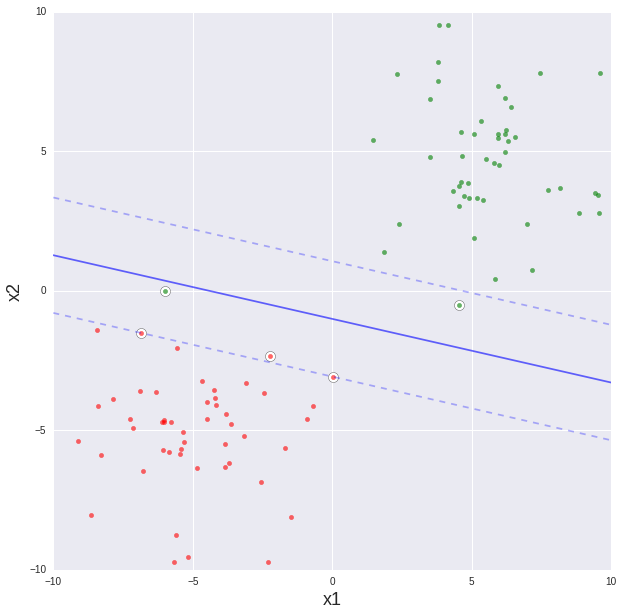

In [53]:
plt.figure(figsize=(10,10))
plot_svc_decision(svc, df)

## Radially separated data

In [61]:
mean_x, mean_y = [0, 0]
sigma_1 = 1
sigma_2 = 2

n = 500

x1 = [gauss(mean_x, sigma_1) for i in xrange(n)]
y1 = [gauss(mean_y, sigma_1) for i in xrange(n)]

x2 = [gauss(mean_x, sigma_2) for i in xrange(n)]
y2 = []
for ele in x2:
    if 36 - ele**2 > 0:
        possible_y2 = np.sqrt(36 - ele**2) + gauss(0,0.3)
    else:
        possible_y2 = gauss(mean_x, sigma_2)
        
    p = np.random.rand()
    if p < 0.5:
        y2.append(-1*possible_y2)
    else: 
        y2.append(possible_y2)   

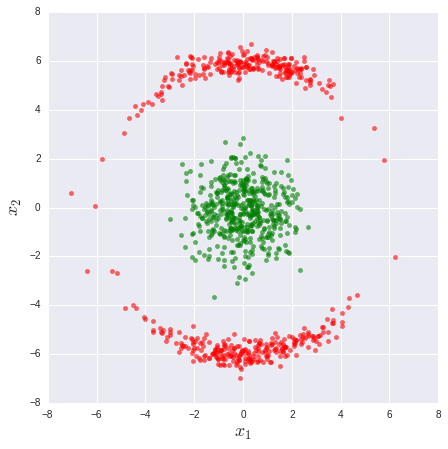

In [72]:
plt.figure(figsize=(7,7))
plt.scatter(x1, y1, color = 'g', alpha = 0.6)
plt.scatter(x2, y2, color = 'r', alpha = 0.6)

plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$x_2$", fontsize = 18)


#plt.xlim([-7,7])
#plt.ylim([-7,7])
plt.savefig("radialdata.png")
plt.show()

In [63]:
tmp1 = np.vstack((x1,y1)).T
tmp2 = np.vstack((x2,y2)).T
X = np.vstack((tmp1, tmp2))

y = np.hstack((np.ones(n), -1*np.ones(n)))

In [64]:
from sklearn import svm
#model = SVC(kernel = 'rbf')
#model.fit(X, y)

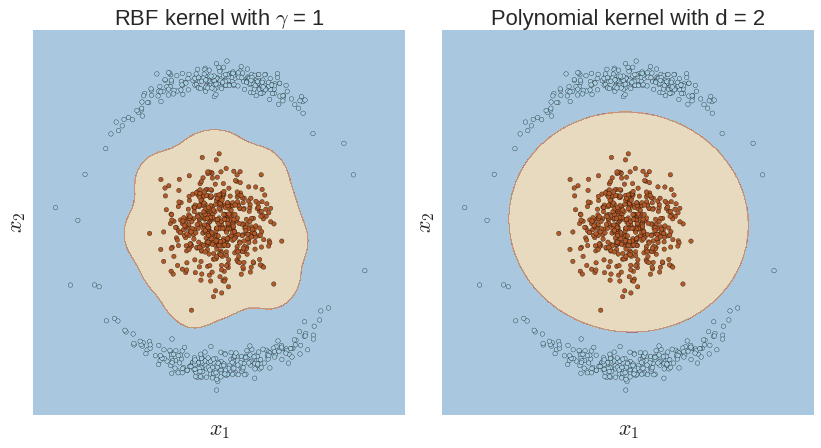

In [71]:
C = 10

rbf_svc = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)

h = .02  

# create a mesh to plot in
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max = [-8, 8]
y_min, y_max = [-8, 8]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(14,6.9))
titles = ["RBF kernel with $\gamma$ = 1", "Polynomial kernel with d = 2"]

for i, clf in enumerate((rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.xlabel("$x_1$", fontsize=22)
    plt.ylabel("$x_2$",fontsize=22)
    
    plt.title(titles[i], fontsize = 22)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.savefig('kernels_nice.svg')
plt.show()